# Normalization, Standardization, and Penalties
Joelle Bailey (800984146) for ECGR 4105 HW1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

import warnings
#warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
# Binary mapping Yes and No to 1 and 0
colToMap = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_map(x):
    return x.map({'yes': 1, 'no':0})

df[colToMap] = df[colToMap].apply(binary_map)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [4]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.8, test_size = 0.2)
df_train.shape

(436, 13)

In [5]:
def find_loss(X, Y, theta, m):
    '''explanation here'''

    h = X.dot(theta)
    error = np.subtract(h,Y)
    squareError = np.square(error)
    J = 1/(2*m) * np.sum(squareError) #loss calculation
    
    return J

In [6]:
def find_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations):
    '''Using gradient descent Comment here'''
    
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        h = X_train.dot(theta)
        
        error = np.subtract(h,Y_train)
        
        dj_dtheta = (1/m_train) * X_train.transpose().dot(error)   #(2,100)dot(100,1)    
    
        theta = theta - alpha*dj_dtheta
        
        training_loss_history[i] = find_loss(X_train, Y_train, theta, m_train)
        validation_loss_history[i] = find_loss(X_test, Y_test, theta, m_test)
        
    return theta, training_loss_history, validation_loss_history

In [7]:
def feature_scale(df_train, df_test, categories, scaler):
    ''' '''
    #Training Setup
    df_norm_train = df_train

    df_norm_train[['price']] = scaler.fit_transform(df_train[['price']])
    df_norm_train[categories] = scaler.fit_transform(df_train[categories])

    Y_norm_train = df_norm_train[['price']].to_numpy()

    m_norm_train = len(Y_norm_train)

    X_norm_train = df_norm_train[categories].to_numpy()
    X_norm_train = np.hstack((np.ones((m_norm_train,1)), X_norm_train))
    
    #Testing Setup
    df_norm_test = df_test

    df_norm_test[['price']] = scaler.fit_transform(df_norm_test[['price']])
    df_norm_test[categories] = scaler.fit_transform(df_norm_test[categories])

    Y_norm_test = df_norm_test[['price']].to_numpy()

    m_norm_test = len(Y_norm_test)

    X_norm_test = df_norm_test[categories].to_numpy()
    X_norm_test = np.hstack((np.ones((m_norm_test,1)), X_norm_test))
    
    return X_norm_train, Y_norm_train, X_norm_test, Y_norm_test
    

## Housing Price Prediction 1a: No Normalization
using categories: area, bedrooms, bathrooms, stories, parking

In [8]:
categories_1 = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Y_train = df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = df_train[categories_1].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = df_test[categories_1].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [9]:
iterations = 500
alpha = 0.000000001

theta = np.zeros((6,1))

theta, training_loss_history, validation_loss_history = find_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)
print('Theta Prediction 1 =', theta)

Theta Prediction 1 = [[3.13561065e-01]
 [8.61036589e+02]
 [1.09683129e+00]
 [5.63000588e-01]
 [8.43335437e-01]
 [2.85563408e-01]]


Text(0.5, 1.0, '1a: No Normalization Training Loss per Iteration')

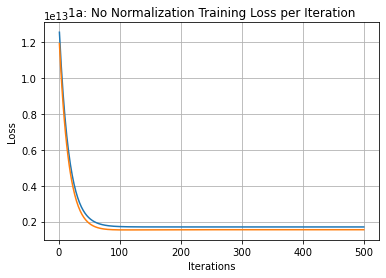

In [10]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1a: No Normalization Training Loss per Iteration')

## Housing Price Prediction 1b: No Normalization
using categories: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea 

In [11]:
categories_2 = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']

Y_train = df_train[['price']].to_numpy()

m_train = len(Y_train)

X_train = df_train[categories_2].to_numpy()
X_train = np.hstack((np.ones((m_train, 1)), X_train))

Y_test = df_test[['price']].to_numpy()

m_test = len(Y_test)

X_test = df_test[categories_2].to_numpy()
X_test = np.hstack((np.ones((m_test, 1)), X_test))

In [12]:
iterations = 500
alpha = 0.000000001

theta = np.zeros((12,1))

theta, training_loss_history, validation_loss_history = find_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, iterations)
print('Theta Prediction 2 =', theta)

Theta Prediction 2 = [[3.13561041e-01]
 [8.61036517e+02]
 [1.09683122e+00]
 [5.63000555e-01]
 [8.43335388e-01]
 [2.83899739e-01]
 [1.08652124e-01]
 [1.79348387e-01]
 [4.03019711e-02]
 [2.05945137e-01]
 [2.85563390e-01]
 [1.23327303e-01]]


Text(0.5, 1.0, '1b: No Normalization Training Loss per Iteration')

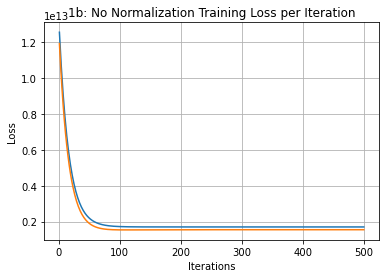

In [13]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('1b: No Normalization Training Loss per Iteration')

## 2a: Standardization and Normalization Process
using categories: area, bedrooms, bathrooms, stories, parking

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Normalization Process
scaler = MinMaxScaler()

#Training Setup
df_norm_train = df_train

df_norm_train[['price']] = scaler.fit_transform(df_train[['price']])
df_norm_train[categories_1] = scaler.fit_transform(df_train[categories_1])

Y_norm_train = df_norm_train[['price']].to_numpy()

m_norm_train = len(Y_norm_train)

X_norm_train = df_norm_train[categories_1].to_numpy()
X_norm_train = np.hstack((np.ones((m_norm_train,1)), X_norm_train))

In [15]:
#Testing Setup
df_norm_test = df_test

df_norm_test[['price']] = scaler.fit_transform(df_norm_test[['price']])
df_norm_test[categories_1] = scaler.fit_transform(df_norm_test[categories_1])

Y_norm_test = df_norm_test[['price']].to_numpy()

m_norm_test = len(Y_norm_test)

X_norm_test = df_norm_test[categories_1].to_numpy()
X_norm_test = np.hstack((np.ones((m_norm_test,1)), X_norm_test))

In [16]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_history, validation_loss_history = find_linear_regression(X_norm_train, Y_norm_train, X_norm_test, Y_norm_test, theta, alpha, iterations)
print('Theta Prediction 2a =', theta)

Theta Prediction 2a = [[0.09500384]
 [0.17381659]
 [0.09700371]
 [0.17097046]
 [0.13712255]
 [0.12607193]]


Text(0.5, 1.0, '2a: Normalization Training Loss per Iteration')

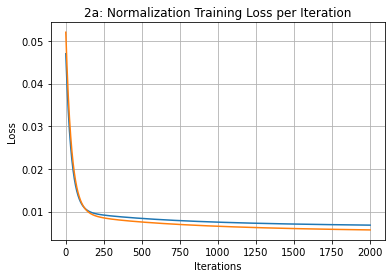

In [17]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2a: Normalization Training Loss per Iteration')

In [18]:
# Standardization Process
scaler = StandardScaler()

#Training Setup
df_norm_train = df_train

df_norm_train[['price']] = scaler.fit_transform(df_train[['price']])
df_norm_train[categories_1] = scaler.fit_transform(df_train[categories_1])

Y_norm_train = df_norm_train[['price']].to_numpy()

m_norm_train = len(Y_norm_train)

X_norm_train = df_norm_train[categories_1].to_numpy()
X_norm_train = np.hstack((np.ones((m_norm_train,1)), X_norm_train))

In [19]:
#Testing Setup
df_norm_test = df_test

df_norm_test[['price']] = scaler.fit_transform(df_norm_test[['price']])
df_norm_test[categories_1] = scaler.fit_transform(df_norm_test[categories_1])

Y_norm_test = df_norm_test[['price']].to_numpy()

m_norm_test = len(Y_norm_test)

X_norm_test = df_norm_test[categories_1].to_numpy()
X_norm_test = np.hstack((np.ones((m_norm_test,1)), X_norm_test))

In [20]:
iterations = 2000
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_history, validation_loss_history = find_linear_regression(X_norm_train, Y_norm_train, X_norm_test, Y_norm_test, theta, alpha, iterations)
print('Theta Prediction 2a =', theta)

Theta Prediction 2a = [[2.94983202e-16]
 [3.88481592e-01]
 [8.90651783e-02]
 [3.04158375e-01]
 [2.40438864e-01]
 [1.60108211e-01]]


Text(0.5, 1.0, '2a: Standardization Training Loss per Iteration')

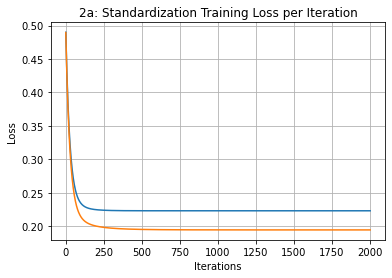

In [21]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2a: Standardization Training Loss per Iteration')

## 2b: Standardization and Normalization Process
using categories: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [22]:
# Normalization Process
scaler = MinMaxScaler()

#Training Setup
df_norm_train = df_train

df_norm_train[['price']] = scaler.fit_transform(df_train[['price']])
df_norm_train[categories_2] = scaler.fit_transform(df_train[categories_2])

Y_norm_train = df_norm_train[['price']].to_numpy()

m_norm_train = len(Y_norm_train)

X_norm_train = df_norm_train[categories_2].to_numpy()
X_norm_train = np.hstack((np.ones((m_norm_train,1)), X_norm_train))

In [23]:
#Testing Setup
df_norm_test = df_test

df_norm_test[['price']] = scaler.fit_transform(df_norm_test[['price']])
df_norm_test[categories_2] = scaler.fit_transform(df_norm_test[categories_2])

Y_norm_test = df_norm_test[['price']].to_numpy()

m_norm_test = len(Y_norm_test)

X_norm_test = df_norm_test[categories_2].to_numpy()
X_norm_test = np.hstack((np.ones((m_norm_test,1)), X_norm_test))

In [24]:
iterations = 4000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_history, validation_loss_history = find_linear_regression(X_norm_train, Y_norm_train, X_norm_test, Y_norm_test, theta, alpha, iterations)
print('Theta Prediction 2b =', theta)

Theta Prediction 2b = [[0.01510195]
 [0.17142513]
 [0.0689308 ]
 [0.17188723]
 [0.11171555]
 [0.04733703]
 [0.04444856]
 [0.02559448]
 [0.08398789]
 [0.08312635]
 [0.08921215]
 [0.0730595 ]]


Text(0.5, 1.0, '2b: Normalization Training Loss per Iteration')

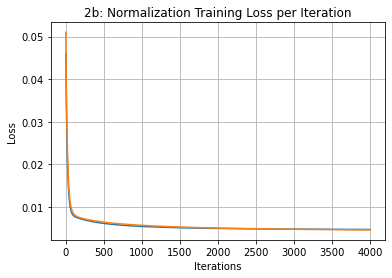

In [25]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2b: Normalization Training Loss per Iteration')

In [26]:
# Standardization Process
scaler = StandardScaler()

#Training Setup
df_norm_train = df_train

df_norm_train[['price']] = scaler.fit_transform(df_train[['price']])
df_norm_train[categories_2] = scaler.fit_transform(df_train[categories_2])

Y_norm_train = df_norm_train[['price']].to_numpy()

m_norm_train = len(Y_norm_train)

X_norm_train = df_norm_train[categories_2].to_numpy()
X_norm_train = np.hstack((np.ones((m_norm_train,1)), X_norm_train))

In [27]:
#Testing Setup
df_norm_test = df_test

df_norm_test[['price']] = scaler.fit_transform(df_norm_test[['price']])
df_norm_test[categories_2] = scaler.fit_transform(df_norm_test[categories_2])

Y_norm_test = df_norm_test[['price']].to_numpy()

m_norm_test = len(Y_norm_test)

X_norm_test = df_norm_test[categories_2].to_numpy()
X_norm_test = np.hstack((np.ones((m_norm_test,1)), X_norm_test))

In [28]:
iterations = 2000
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_history, validation_loss_history = find_linear_regression(X_norm_train, Y_norm_train, X_norm_test, Y_norm_test, theta, alpha, iterations)
print('Theta Prediction 2b =', theta)

Theta Prediction 2b = [[2.08721929e-16]
 [2.86794094e-01]
 [5.67079803e-02]
 [2.60177941e-01]
 [2.00679660e-01]
 [8.59338997e-02]
 [8.77068889e-02]
 [8.74907280e-02]
 [1.26523843e-01]
 [2.19597829e-01]
 [1.11769169e-01]
 [1.60274069e-01]]


Text(0.5, 1.0, '2b: Standardization Training Loss per Iteration')

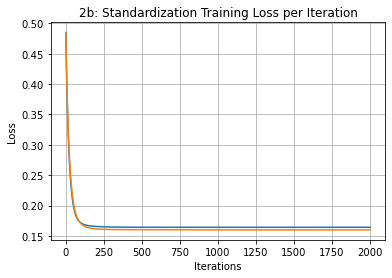

In [29]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('2b: Standardization Training Loss per Iteration')

## 3a: Feature Scaling with Penalities
using categories: area, bedrooms, bathrooms, stories, parking

In [30]:
def find_penalty_loss(X, Y, theta, m):
    '''c'''

    h = X.dot(theta)
    error = np.subtract(h,Y)
    squareError = np.square(error)
    J = 1/(2*m) * np.sum(squareError) #loss calculation
    
    return J

In [31]:
def find_penalty_linear_regression(X_train, Y_train, X_test, Y_test, theta, alpha, penalty, iterations):
    '''Using gradient descent'''
    
    training_loss_history = np.zeros(iterations)
    validation_loss_history = np.zeros(iterations)
    
    for i in range(iterations):
        h = X_train.dot(theta)
        
        error = np.subtract(h,Y_train)
        
        dj_dtheta = (1/m_train) * X_train.transpose().dot(error)   #(2,100)dot(100,1)    
    
        theta = theta*(1-alpha*penalty/m_train) - alpha*dj_dtheta  #penalty added here
        
        training_loss_history[i] = find_penalty_loss(X_train, Y_train, theta, m_train)
        validation_loss_history[i] = find_penalty_loss(X_test, Y_test, theta, m_test)
        
    return theta, training_loss_history, validation_loss_history

In [32]:
X_norm_train, Y_norm_train, X_norm_test, Y_norm_test = feature_scale(df_train, df_test, categories_1, MinMaxScaler())

In [33]:
iterations = 4000
penalty = 1
alpha = 0.01

theta = np.zeros((6,1))

theta, training_loss_history, validation_loss_history = find_penalty_linear_regression(X_norm_train, Y_norm_train, X_norm_test, Y_norm_test, theta, alpha, penalty, iterations)
print('Theta Prediction 3a =', theta)

Theta Prediction 3a = [[0.07157215]
 [0.24612363]
 [0.09945522]
 [0.19764804]
 [0.14062242]
 [0.12353226]]


Text(0.5, 1.0, '3a: Penalty and Normalization Training Loss per Iteration')

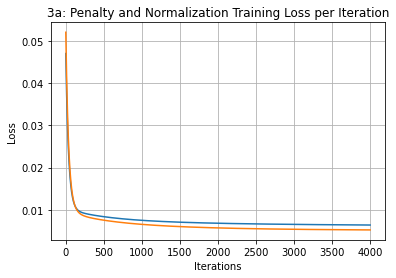

In [34]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3a: Penalty and Normalization Training Loss per Iteration')

## 3b: Feature Scaling with Penalities
using categories: area, bedrooms, bathrooms, stories, mainroad, guestroom, basement, hotwaterheating, airconditioning, parking, prefarea

In [35]:
X_norm_train, Y_norm_train, X_norm_test, Y_norm_test = feature_scale(df_train, df_test, categories_2, MinMaxScaler())

In [36]:
iterations = 4000
penalty = 10
alpha = 0.01

theta = np.zeros((12,1))

theta, training_loss_history, validation_loss_history = find_penalty_linear_regression(X_norm_train, Y_norm_train, X_norm_test, Y_norm_test, theta, alpha, penalty, iterations)
print('Theta Prediction 3b =', theta)

Theta Prediction 3b = [[0.03168419]
 [0.12787466]
 [0.0633683 ]
 [0.13995762]
 [0.09968573]
 [0.05319526]
 [0.04349824]
 [0.02752653]
 [0.06323221]
 [0.08333335]
 [0.08155385]
 [0.07063083]]


Text(0.5, 1.0, '3b: Penalty and Normalization Training Loss per Iteration')

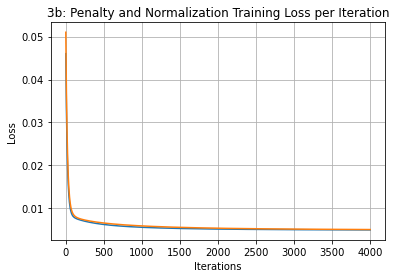

In [37]:
plt.plot(range(1, iterations + 1), training_loss_history)
plt.plot(range(1, iterations + 1), validation_loss_history)
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('3b: Penalty and Normalization Training Loss per Iteration')